# Проект: Принятие решений в бизнесе.

**Описание проекта**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Описание данных**

*Данные для первой части*

Файл `/datasets/hypothesis.csv`.
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

*Данные для второй части*

Файл `/datasets/orders.csv`. 
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`. 
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез.


In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')
except Exception:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

pd.options.display.max_colwidth = 120
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### ICE

In [3]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts']
hypothesis[['hypothesis', 'ice']].round(1).sort_values(by='ice', ascending = False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Наиболее перспективные гипотеы по ICE, это гипотезы с индексами 8, 0 и 7.

### RICE

In [4]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'rice']].round(1).sort_values(by='rice', ascending = False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотеы по RICE, это гипотезы с индексами 7, 2, 0 и 6.

Мы видим что порядок приоретизации гипотез при применении RICE и ICE не совпадает. Это связано с тем что RICE учитывает параметр _Reach_, которы обозначает количество пользователей, которых затронет изменение.


## Часть 2. Анализ A/B-теста

In [5]:
try:
    orders, visitors = (
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv'),
    )
except Exception:
    orders, visitors = (
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv'),
    )

In [6]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Проверим, не пересекаются ли пользователи из групп А и Б в полученных нами данных.

In [8]:
def intersection_list(orders_A, orders_B): 
   return set(orders_A).intersection(orders_B) 
 
orders_A = orders.query('group == "A"')
orders_A = orders_A['visitorId'].drop_duplicates()
orders_B = orders.query('group == "B"')
orders_B = orders_B['visitorId'].drop_duplicates()
 
recurring_users = intersection_list(orders_A, orders_B)
 
recurring_users = len([item for item in recurring_users])
 
print(f'Количество пересекающихся пользователей:',recurring_users)

Количество пересекающихся пользователей: 58


В группах есть пересекающиеся пользователи, но так как у нас нет дополнительной информации об условиях и целях теста, нет причин полагать что это недопустимо. Поэтому пользователей мы не удаляем.


In [9]:
print(f'Всего групп, учавствующих в тесте: ', visitors['group'].nunique())

Всего групп, учавствующих в тесте:  2


In [10]:
print(f'Дата начала теста: ', orders['date'].min())
print(f'Дата оконания теста: ', orders['date'].max())


Дата начала теста:  2019-08-01 00:00:00
Дата оконания теста:  2019-08-31 00:00:00


Проверим данные на наличие пропусков и дубликатов.

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
orders.duplicated().sum()

0

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
visitors.duplicated().sum()

0

В данных нет пропусков и дубликатов

Соберем кумулятивные данные в датафрейм `cumulativeData`. Для этого создадим массив уникальных пар значений дат и групп теста, получим агрегированные кумулятивные по дням данные о заказах и о посетителях и объединим эти данные в одной таблице и присваиваем ее столбцам понятные названия.

In [15]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### Построим графики кумулятивной выручки по дням и группам

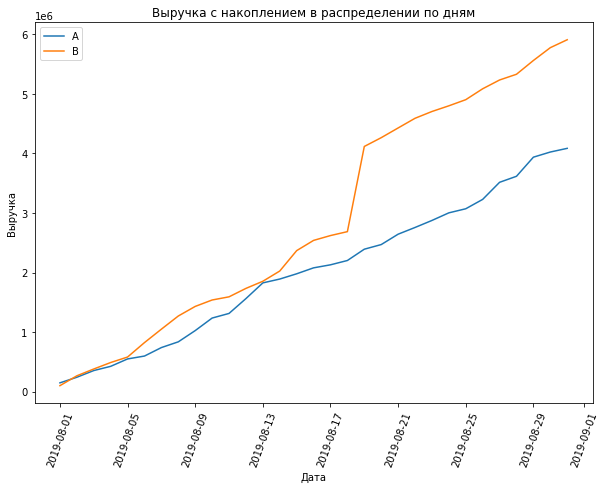

In [16]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=70)
plt.title('Выручка с накоплением в распределении по дням')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend();

Выручка группы В больше выручки группы А. Выручка группы А распределена равномерно, а вот у группы В мы можем наблюдать резкий скачек выручки 18-19 августа. Это может быть связано с ростом количества заказов либо с появлением очень дорогих заказов в эти дни.

#### Построим график кумулятивного среднего чека по группам

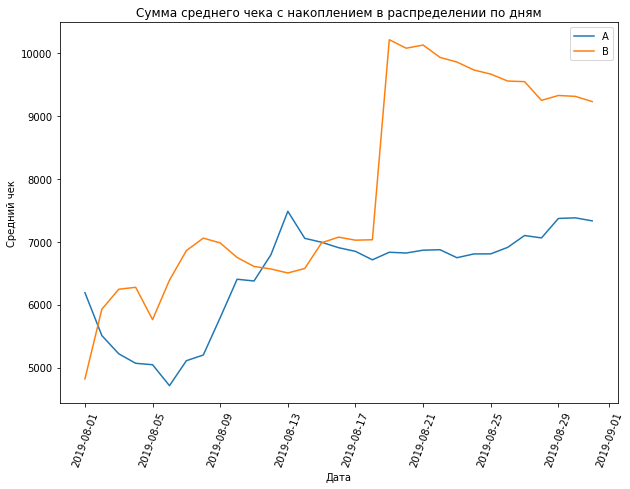

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=70)
plt.title('Сумма среднего чека с накоплением в распределении по дням')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend();

Средний чек для группы А становится равномерным ближе к концу теста. У группы В мы снова видим резкий всплеск на графике, что говорит нам о наличии крупных заказов.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

Соберем данные в одном датафрейме, построим отношение средних чеков и проведем горизонтальную ось. 

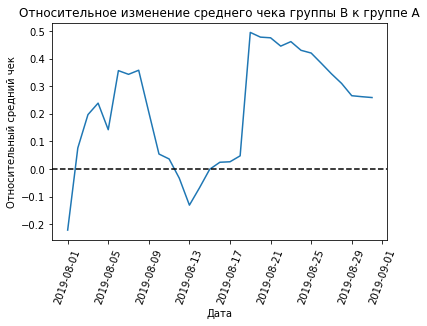

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, label="Относительное изменение среднего чека группы B относительно группы A")
plt.xticks(rotation=70)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Относительный средний чек');

Снова видим резкие скачки на графике, что подтверждает начиличие крупных заказов и выбросов.

#### Построим график кумулятивной конверсии по группам

Посчитаем кумулятивную конверсию и отделим данные по группам, затем построим графики.

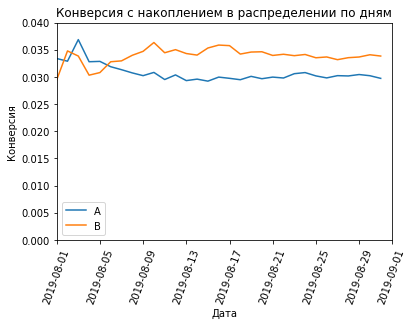

In [19]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=70)
plt.title('Конверсия с накоплением в распределении по дням')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()

plt.axis([dt.datetime.strptime('2019-08-01', '%Y-%m-%d'), dt.datetime.strptime('2019-09-01', '%Y-%m-%d'), 0, 0.040]);


В начале теста конверсия у двух групп колебалась, но потом стабилизировалась, и конверсия группы В стабильно стала превышать конверсию группы А.

#### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

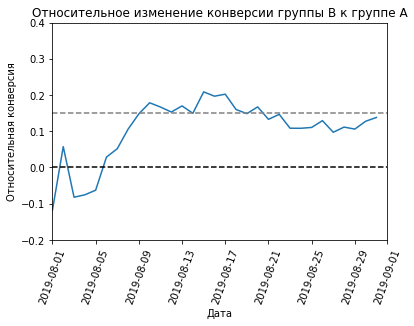

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительное изменение конверсии группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Относительная конверсия')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime.strptime('2019-08-01', '%Y-%m-%d'), dt.datetime.strptime('2019-09-01', '%Y-%m-%d'), -0.2, 0.4])
plt.xticks(rotation=70);

Конверсия группы В в начале теста проигрывала группе А, но затем выросла и стабильно стала её превышать, теперь она постепенно растет. 

#### Построим точечный график количества заказов по пользователям

In [21]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


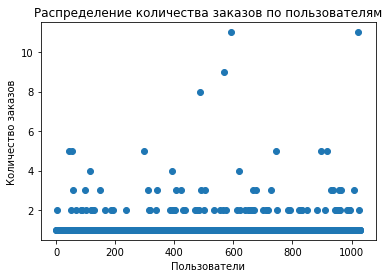

In [34]:
plt.scatter(ordersByUsers.index, ordersByUsers['orders'])
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов');

На графике видно, что большество бользователей делали заказ 1-2 раза. Пользователей, совершивших 4 и более заказов очень мало.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [23]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей делали заказ больше 2 раз и всего 1% пользователей совершал заказ 4 и более раз. Примем 2 заказа на одного пользователя за верхнюю границу числа заказов, и далее по ней будем отсеивать аномальных пользователей.

#### Построим точечный график стоимостей заказов

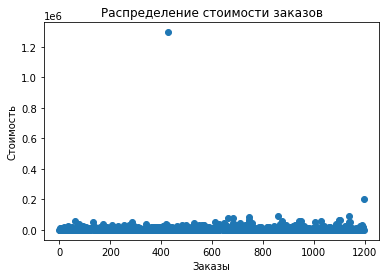

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость');

Почти все заказы равномерно распределены по стоимости и лишь несколько выбиваются.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [25]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% заказов стояли дороже 28 000 и не более 1% стояли дороже 58 233. Примем 28 000 за верхнюю границу стоимости заказов и по ней будем отсеивать аномальных пользователей.

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.  Для подсчета статистической значимости применим критерий Манна-Уитни, так как мы уже выяснили, что данные содержат выбросы, а значит лучше использовать непараметрические критерии. Уровень значимости: alpha=0.05.

Подготовим данные. Соберем в одну таблицу распределяя по группам количество заказов, выручку, количество пользователей, а так же все эти показатели суммарно с накоплением для каждой даты.

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
                                        .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),axis=1).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                                        .agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,20,148579,20,101217,20,148579,20,101217,719,713,719,713
1,2019-08-02,19,93822,23,165531,39,242401,43,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,63,354874,59,380996,507,509,1845,1803
3,2019-08-04,15,70825,16,108571,78,425699,75,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,103,549917,98,581995,756,707,3318,3280


Разделим пользователей, которые совершили хотя бы 1 заказ, по группам и посчитаем заказы. После создадим переменные, в которых пользователям из разных групп будет соответствовать количество заказов.

In [27]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Теперь посчитаем статистическую значимость и посмотрим на относительный прирост среднего числа заказов группы B.

In [28]:
print('p-value = ''{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего числа заказов группы B = '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный прирост среднего числа заказов группы B = 0.138


Отвергаем нулевую гипотезу о том что различий в среднем количестве заказов между группами нет. Различия есть, и прирост среднего числа заказов группы В равен 13,2%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [29]:
print('p-value = ''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост в среднем чеке группы B = ''{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Относительный прирост в среднем чеке группы B = 0.259


P-value больше 0.05, а это значит, что мы не можем отвергать нулевую гипотезу и причин считать, что в среднем чеке есть различия, нет. При этом прирост группы В в среднем чеке составляет 25,9%. Такой результат не вызывает доверия, и получили его мы скорее всего из-за наличия выбросов в данных. Поэтому стоит посмотреть на результаты по очищенным данным.

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным

Сделаем срезы данных, отбросим до 5% покупателей, совершивших более 2 заказов, и пользователей, совершивших заказы дороже 28 000.

In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


Всего таких пользователей - 74.

Теперь посчитаем статистическую знаимость по отфильтрованным данным. Для этого подготовим выборки количества заказов по пользователям по группам теста.

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [32]:
print('p-value = ''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B = ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.013
Относительный прирост среднего числа заказов группы B = 0.173


Результат по среднему количеству заказов почти не изменился. Прирост среднего числа заказов группы В увеличился до 17,3%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [33]:
print(
    'p-value = ''{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост в среднем чеке группы B = ''{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.738
Относительный прирост в среднем чеке группы B = -0.020


P-value почти не измеился,а вот средний чек в группе В вместо прироста в 25,9% показыват проигрыш на 2% группе А. 

## Вывод

- Есть статистически значимое различие в среднем числе заказов группы А и группы В как по сырым данным, так и после фильтрации аномалий
- Нет статистически значимого различия по среднему чеку между группами по сырым данным и после фильтрации, но после удаления аномалий прирост группы В сменился на проигрыш в 2%.
- График прироста конверсии показывает что результаты группы В стабильно лучше группы А
- График различия среднего чека показал нам большие скачки, что позволило выявить аномалии среди стоимостей заказов

На основе полученных резьтатов теста следует принять решение об остановке теста. Зафиксируем, что в группе Б среднее число заказов превышает среднее число заказов в группе А, что означает ее победу.
